In [1]:
import os
import numpy as np
import sklearn
import pydicom
import matplotlib.pyplot as plt
import pickle
from keras.models import load_model, model_from_json
import glob
from scale import scale

np.random.seed(42)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
dimension = (576, 640, 1)

In [3]:
folder = "/data3/wv2019/data/PLIC_CHIESA_DICOM/"

In [4]:
json_file = open('model_struct.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model_weights.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
x_ts = []
imgs = [] 
for filename in os.listdir(folder)[-20:]:
    file = pydicom.dcmread(os.path.join(folder, filename))
    pixels = file.pixel_array
    if (file.pixel_array[:, :, :1].shape == dimension):
#         plt.imshow(pixels[0])
#         plt.show()
#         pixels = scale(file.pixel_array[0], dimension)
    
        x_ts.append(pixels[:, :, :1])
        imgs.append(pixels)

x_ts = np.array(x_ts)

In [6]:
def apply_mask(img, mask):
    assert img[:, :, :1].shape == mask.shape
    img = img.astype(np.float64)
    mask[mask <= 0.38] = 0
    for i in range(img.shape[-1]):
        img[..., i] /= 255
        img[..., i] *= mask[..., 0]
    return img

In [7]:
prediction = model.predict(x_ts, batch_size=2)

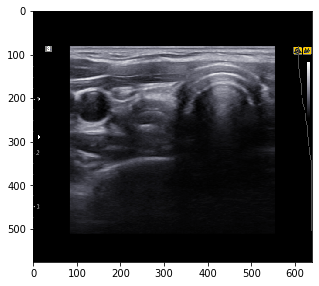

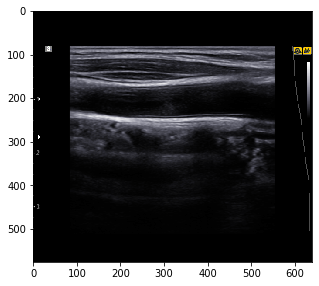

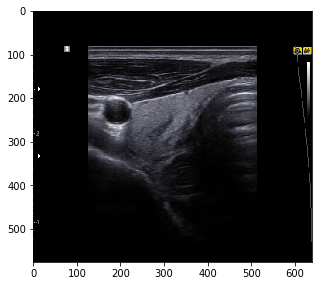

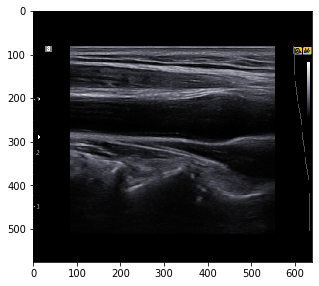

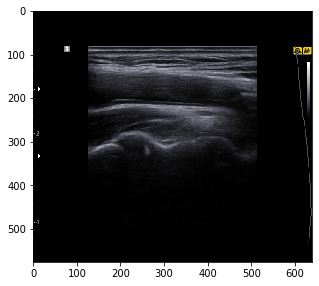

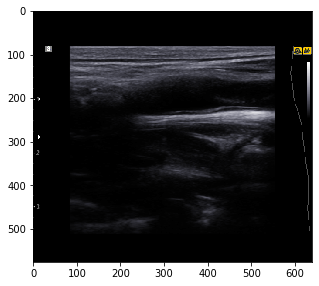

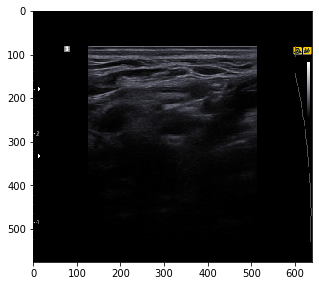

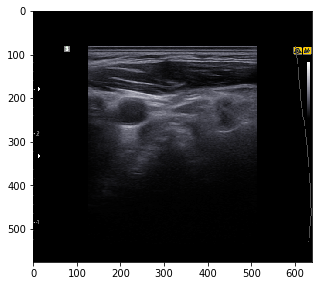

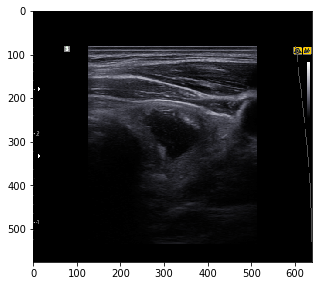

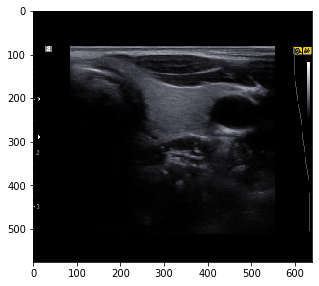

In [8]:
for i, mask in enumerate(prediction[:10]):
    masked_img = apply_mask(imgs[i], mask)
    
    plt.figure(figsize = (5, 5))

    plt.imshow(masked_img)
    plt.show()